In [37]:
import pandas as pd 
usa_df = pd.read_csv("data\\usa_sample100.csv")
usa_df
# # random 
# df_sample = usa_df.sample(n=100000, random_state=42)  # random_state για αναπαραγωγιμότητα

# # guardar 
# df_sample.to_csv("usa_sample100.csv", index=False)

,Country,Area,Waterbody Type,Date,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),Orthophosphate (mg/l),pH (ph units),Temperature (cel),Nitrogen (mg/l),Nitrate (mg/l),CCME_Values,CCME_WQI
0,USA,San Joaquin,River,03-09-2002,0.0210,1.6,11.300000,0.27,7.80,10.0,0.4,0.900,83.081086,Good
1,USA,Los Angeles,River,12-05-1978,0.0210,1.6,11.684103,0.04,7.40,11.7,0.4,1.580,100.000000,Excellent
2,USA,Butte,River,20-01-2004,0.0210,1.6,0.438000,0.04,7.80,11.2,0.4,0.900,100.000000,Excellent
3,USA,Lake Sammamish,Lake,11-09-2007,0.0210,1.6,7.000000,0.04,7.54,11.1,0.4,0.900,100.000000,Excellent
4,USA,Central Puget Sound,Marine,06-05-2019,0.0373,1.6,9.870000,0.04,7.80,11.1,0.4,0.323,100.000000,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,USA,Glenn,River,06-03-2002,0.0210,1.6,12.400000,0.01,7.80,5.8,0.4,0.900,100.000000,Excellent
99996,USA,Central Puget Sound,Marine,17-09-2008,0.0200,1.6,9.870000,0.04,7.80,13.3,0.4,0.900,100.000000,Excellent
99997,USA,Santa Clara,River,11-07-1988,0.0210,1.6,9.870000,0.04,6.90,11.1,0.4,0.900,100.000000,Excellent
99998,USA,San Mateo,River,29-11-1973,0.0210,1.6,9.870000,0.04,8.20,11.1,0.4,0.900,100.000000,Excellent


In [3]:
usa_df["Waterbody Type"].value_counts()


Waterbody Type
River     28677
Lake       9116
Marine     2207
Name: count, dtype: int64

In [4]:
usa_df["Area"].value_counts()


Area
Lake Washington                      5183
Lake Sammamish                       2555
Central Puget Sound                  2169
Los Angeles                          2065
San Joaquin                          1761
                                     ... 
21N02E21M001M                           1
03S02E08N002M                           1
SAN PABLO BAY A PT DAVIS                1
04S02W22P002M                           1
01N02E01F001M                           1
Name: count, Length: 432, dtype: int64

#### MINI EDA por los 3 lagos de Seattle 

In [33]:

selected_areas = ['Lake Sammamish', 'Lake Washington', 'Central Puget Sound',"Lake Union/Ship Canal","Los Angeles","Lake Union/Ship Canal"]
filtered_usa_df = usa_df[usa_df['Area'].isin(selected_areas)].copy()

grouped_usa_stats = filtered_usa_df.groupby('Area').agg({
    'Ammonia (mg/l)': ['mean', 'std', 'median'],
    'Biochemical Oxygen Demand (mg/l)': ['mean', 'std', 'median'],
    'Dissolved Oxygen (mg/l)': ['mean', 'std', 'median'],
    'Orthophosphate (mg/l)': ['mean', 'std', 'median'],
    'pH (ph units)': ['mean', 'std', 'median'],
    'Temperature (cel)': ['mean', 'std', 'median'],
    'Nitrogen (mg/l)': ['mean', 'std', 'median'],
    'Nitrate (mg/l)': ['mean', 'std', 'median'],
    'CCME_Values': ['mean', 'std', 'median']
})

grouped_usa_stats

Ammonia (mg/l)                   \
                                mean       std median   
Area                                                    
Central Puget Sound         0.024641  0.039856  0.021   
Lake Sammamish              0.021875  0.036616  0.021   
Lake Union/Ship Canal       0.030542  0.114965  0.021   
Lake Washington             0.021375  0.049107  0.021   
Los Angeles                 0.243561  2.185458  0.021   

                      Biochemical Oxygen Demand (mg/l)                   \
                                                  mean       std median   
Area                                                                      
Central Puget Sound                           1.600000  0.000000    1.6   
Lake Sammamish                                1.600000  0.000000    1.6   
Lake Union/Ship Canal                         1.599034  0.234492    1.6   
Lake Washington                               1.600000  0.000000    1.6   
Los Angeles                                   3.349905  9.502378    1.6   

                      Dissolved Oxygen (mg/l)                   \
                                         mean       std median   
Area                                                             
Central Puget Sound                  9.391872  1.649496   9.87   
Lake Sammamish                       9.731127  1.695819   9.87   
Lake Union/Ship Canal                9.779694  1.368256   9.87   
Lake Washington                      9.866512  1.053294   9.87   
Los Angeles                          9.987357  1.629146   9.87   

                      Orthophosphate (mg/l)  ... Temperature (cel)  \
                                       mean  ...            median   
Area                                         ...                     
Central Puget Sound                0.049700  ...              11.1   
Lake Sammamish                     0.036331  ...              11.1   
Lake Union/Ship Canal              0.039838  ...              11.1   
Lake Washington                    0.040246  ...              11.1   
Los Angeles                        0.042527  ...              11.1   

                      Nitrogen (mg/l)                  Nitrate (mg/l)  \
                                 mean       std median           mean   
Area                                                                    
Central Puget Sound          0.399486  0.071999    0.4       0.562128   
Lake Sammamish               0.403849  0.060050    0.4       0.795983   
Lake Union/Ship Canal        0.388714  0.121403    0.4       0.763613   
Lake Washington              0.387718  0.055800    0.4       0.783758   
Los Angeles                  0.498880  1.044066    0.4       6.148471   

                                        CCME_Values                   
                             std median        mean       std median  
Area                                                                  
Central Puget Sound     0.306574  0.421   97.261377  3.438862  100.0  
Lake Sammamish          0.244479  0.900   99.517308  1.854517  100.0  
Lake Union/Ship Canal   0.300369  0.900   99.659264  2.442290  100.0  
Lake Washington         0.267733  0.900   99.835819  1.401166  100.0  
Los Angeles            12.782780  0.900   97.556017  6.429507  100.0  

[5 rows x 27 columns]

In [1]:
import pandas as pd

file_path = "data/usa_sample100.csv"
df = pd.read_csv(file_path)

mean_ccme_by_area = df.groupby('Area')['CCME_Values'].mean()

lowest_mean_ccme = mean_ccme_by_area.sort_values()


lowest_mean_ccme

Area
HYPHUS CR NR LODOGA                   56.647120
18N03E28N001M                         58.652676
03S02E15B004M                         60.843061
VALLECITOS ATOMIC LAB C TRIB RES      64.112265
13N01W30F001M                         67.158351
                                        ...    
22N01E09R001M                        100.000000
ROCK C A HWY 99E NR CHICO            100.000000
22N01E09G001M                        100.000000
21N01E01G002M                        100.000000
01N01E33K001M                        100.000000
Name: CCME_Values, Length: 626, dtype: float64

In [ ]:
import pandas as pd

file_path = "data/usa_sample100.csv"
df = pd.read_csv(file_path)

area_counts = df["Area"].value_counts()
mean_ccme_by_area = df.groupby("Area")["CCME_Values"].mean()

combined_df = pd.DataFrame({
    "Número de muestras": area_counts,
    "Promedio CCME_Values": mean_ccme_by_area
})

filtered_combined_df = combined_df[combined_df["Número de muestras"] >= 30]

worst_quality_areas = filtered_combined_df.sort_values(by="Promedio CCME_Values", ascending=True)

print("Top áreas con peor calidad de agua (bajo promedio CCME_Values):")
worst_quality_areas


Top áreas con peor calidad de agua (bajo promedio CCME_Values):


,Número de muestras,Promedio CCME_Values
Area,,
CONST DR SUMP A ITALIAN SLD BYRON,32,88.138136
Old River 6/10 mile below DMC intake.,44,89.228863
CALAVERAS R NR JENNY LIND,36,89.500005
ITALIAN SLU NR MO,65,89.543027
INDIAN SLU NR BRENTWOOD,43,89.727629
...,...,...
Rock,71,100.000000
Inyo,33,100.000000
Harris Creek,92,100.000000


###### conglusion = no hay mucha differencia 

In [4]:

usa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           40000 non-null  object 
 1   Area                              40000 non-null  object 
 2   Waterbody Type                    40000 non-null  object 
 3   Date                              40000 non-null  object 
 4   Ammonia (mg/l)                    40000 non-null  float64
 5   Biochemical Oxygen Demand (mg/l)  40000 non-null  float64
 6   Dissolved Oxygen (mg/l)           40000 non-null  float64
 7   Orthophosphate (mg/l)             40000 non-null  float64
 8   pH (ph units)                     40000 non-null  float64
 9   Temperature (cel)                 40000 non-null  float64
 10  Nitrogen (mg/l)                   40000 non-null  float64
 11  Nitrate (mg/l)                    40000 non-null  float64
 12  CCME

In [32]:

area_quality_counts = usa_df.groupby(['Area', 'CCME_WQI']).size().unstack(fill_value=0)

area_quality_percent = area_quality_counts.div(area_quality_counts.sum(axis=1), axis=0) * 100

area_quality_percent['Total Samples'] = area_quality_counts.sum(axis=1)

filtered_areas = area_quality_percent[area_quality_percent['Total Samples'] >= 30].copy()

filtered_areas['Polluted %'] = filtered_areas.get('Poor', 0) + filtered_areas.get('Marginal', 0)
filtered_areas['Clean %'] = filtered_areas.get('Excellent', 0) + filtered_areas.get('Good', 0)

most_polluted_areas = filtered_areas.sort_values(by='Polluted %', ascending=False)

most_clean_areas = filtered_areas.sort_values(by='Clean %', ascending=False)

most_polluted_areas

CCME_WQI,Excellent,Fair,Good,Marginal,Poor,Total Samples,Polluted %,Clean %
Area,,,,,,,,
Riverside,77.947598,2.074236,13.973799,6.004367,0.0,1832,6.004367,91.921397
Kings,56.220096,4.545455,34.210526,5.023923,0.0,836,5.023923,90.430622
Lake,79.378718,2.709848,13.218771,4.692664,0.0,1513,4.692664,92.597488
THERMALITO AFTERBAY A FEATHER R,95.555556,0.000000,0.000000,4.444444,0.0,45,4.444444,95.555556
Sonoma,85.410765,2.266289,8.073654,4.249292,0.0,706,4.249292,93.484419
...,...,...,...,...,...,...,...,...
Juanita,98.187311,0.000000,1.812689,0.000000,0.0,331,0.000000,100.000000
Jenkins,97.235023,0.000000,2.764977,0.000000,0.0,217,0.000000,100.000000
Inyo,100.000000,0.000000,0.000000,0.000000,0.0,33,0.000000,100.000000


In [17]:
area_quality_percent

CCME_WQI,Excellent,Fair,Good,Marginal,Poor,Total Samples
Area,,,,,,
01N01E33K001M,100.000000,0.000000,0.000000,0.000000,0.0,1
01N01W04A001M,50.000000,0.000000,50.000000,0.000000,0.0,2
01N01W07K001M,100.000000,0.000000,0.000000,0.000000,0.0,1
01N01W29G001M,0.000000,0.000000,100.000000,0.000000,0.0,1
01N02E01F001M,100.000000,0.000000,0.000000,0.000000,0.0,1
...,...,...,...,...,...,...
Whidbey,62.222222,0.000000,37.777778,0.000000,0.0,90
Yarrow,100.000000,0.000000,0.000000,0.000000,0.0,38
Yolo,64.408233,1.972556,33.018868,0.600343,0.0,1166


In [30]:
# Λίστα περιοχών ενδιαφέροντος
areas_of_interest = [
    "Sacramento R A HAMILTON CITY",
    "Sacramento R A COLUSA",
    "Sacramento River @ Mallard Island",
    "D10A Sacramento"
]
# Αναζήτηση όλων των καταγραφών που περιέχουν "Sacramento" στην περιοχή
filtered_df = usa_df[usa_df['Area'].str.contains("Sacramento", case=False, na=False)]

# Έλεγχος για τις περιοχές ενδιαφέροντος (χρησιμοποιούμε lowercase σύγκριση για ασφάλεια)
filtered_df_lower = filtered_df.copy()
filtered_df_lower['Area_lower'] = filtered_df_lower['Area'].str.lower()

# Λίστα περιοχών με πεζά για αντιστοίχιση
areas_lower = [area.lower() for area in areas_of_interest]

# Φιλτράρισμα με βάση τις 4 περιοχές
matches = filtered_df_lower[filtered_df_lower['Area_lower'].isin(areas_lower)]

# Αφαίρεση της βοηθητικής στήλης
matches = matches.drop(columns=['Area_lower'])

filtered_df_lower


,Country,Area,Waterbody Type,Date,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),Orthophosphate (mg/l),pH (ph units),Temperature (cel),Nitrogen (mg/l),Nitrate (mg/l),CCME_Values,CCME_WQI,Area_lower
165,USA,Sacramento,River,26-09-2018,0.021,1.6,9.870000,0.04,7.8,11.1,0.400,0.90,100.000000,Excellent,sacramento
166,USA,Sacramento,River,30-09-2003,0.021,1.6,9.870000,0.30,7.8,11.1,0.800,4.00,81.706106,Good,sacramento
180,USA,Sacramento,River,16-09-1975,0.021,1.6,9.870000,0.04,7.8,6.4,0.200,0.14,100.000000,Excellent,sacramento
257,USA,SACRAMENTO R A COLUSA,River,08-09-1961,0.021,1.3,9.000000,0.04,7.8,64.0,0.413,0.90,90.491117,Good,sacramento r a colusa
266,USA,Sacramento,River,30-10-1968,0.021,1.6,8.640000,0.04,7.8,11.4,0.400,0.90,100.000000,Excellent,sacramento
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99881,USA,Sacramento,River,08-11-2022,0.021,1.6,11.684103,0.04,7.8,19.0,0.196,0.90,100.000000,Excellent,sacramento
99882,USA,Sacramento,River,01-09-1960,0.021,1.6,7.520000,0.04,8.0,9.7,0.400,1.60,100.000000,Excellent,sacramento
99901,USA,SACRAMENTO R A HAMILTON CITY,River,08-06-1961,0.021,0.8,8.800000,0.04,6.4,62.0,0.448,0.27,90.700402,Good,sacramento r a hamilton city
99934,USA,Sacramento,River,09-05-1974,0.080,1.6,9.870000,0.05,7.8,11.1,0.360,0.15,100.000000,Excellent,sacramento


In [29]:
filtered_df_lower.groupby('Area')['CCME_Values'].mean()


Area
SACRAMENTO R A COLUSA                        94.557536
SACRAMENTO R A HAMILTON CITY                 94.213641
SACRAMENTO R AB BIG CHICO C                 100.000000
SACRAMENTO R BL WILKINS SLU NR GR           100.000000
SACRAMENTO R NR MALLARD ISL                  89.850462
Sacramento                                   97.608997
Sacramento River @ Mallard Island - D10A     91.588845
Name: CCME_Values, dtype: float64

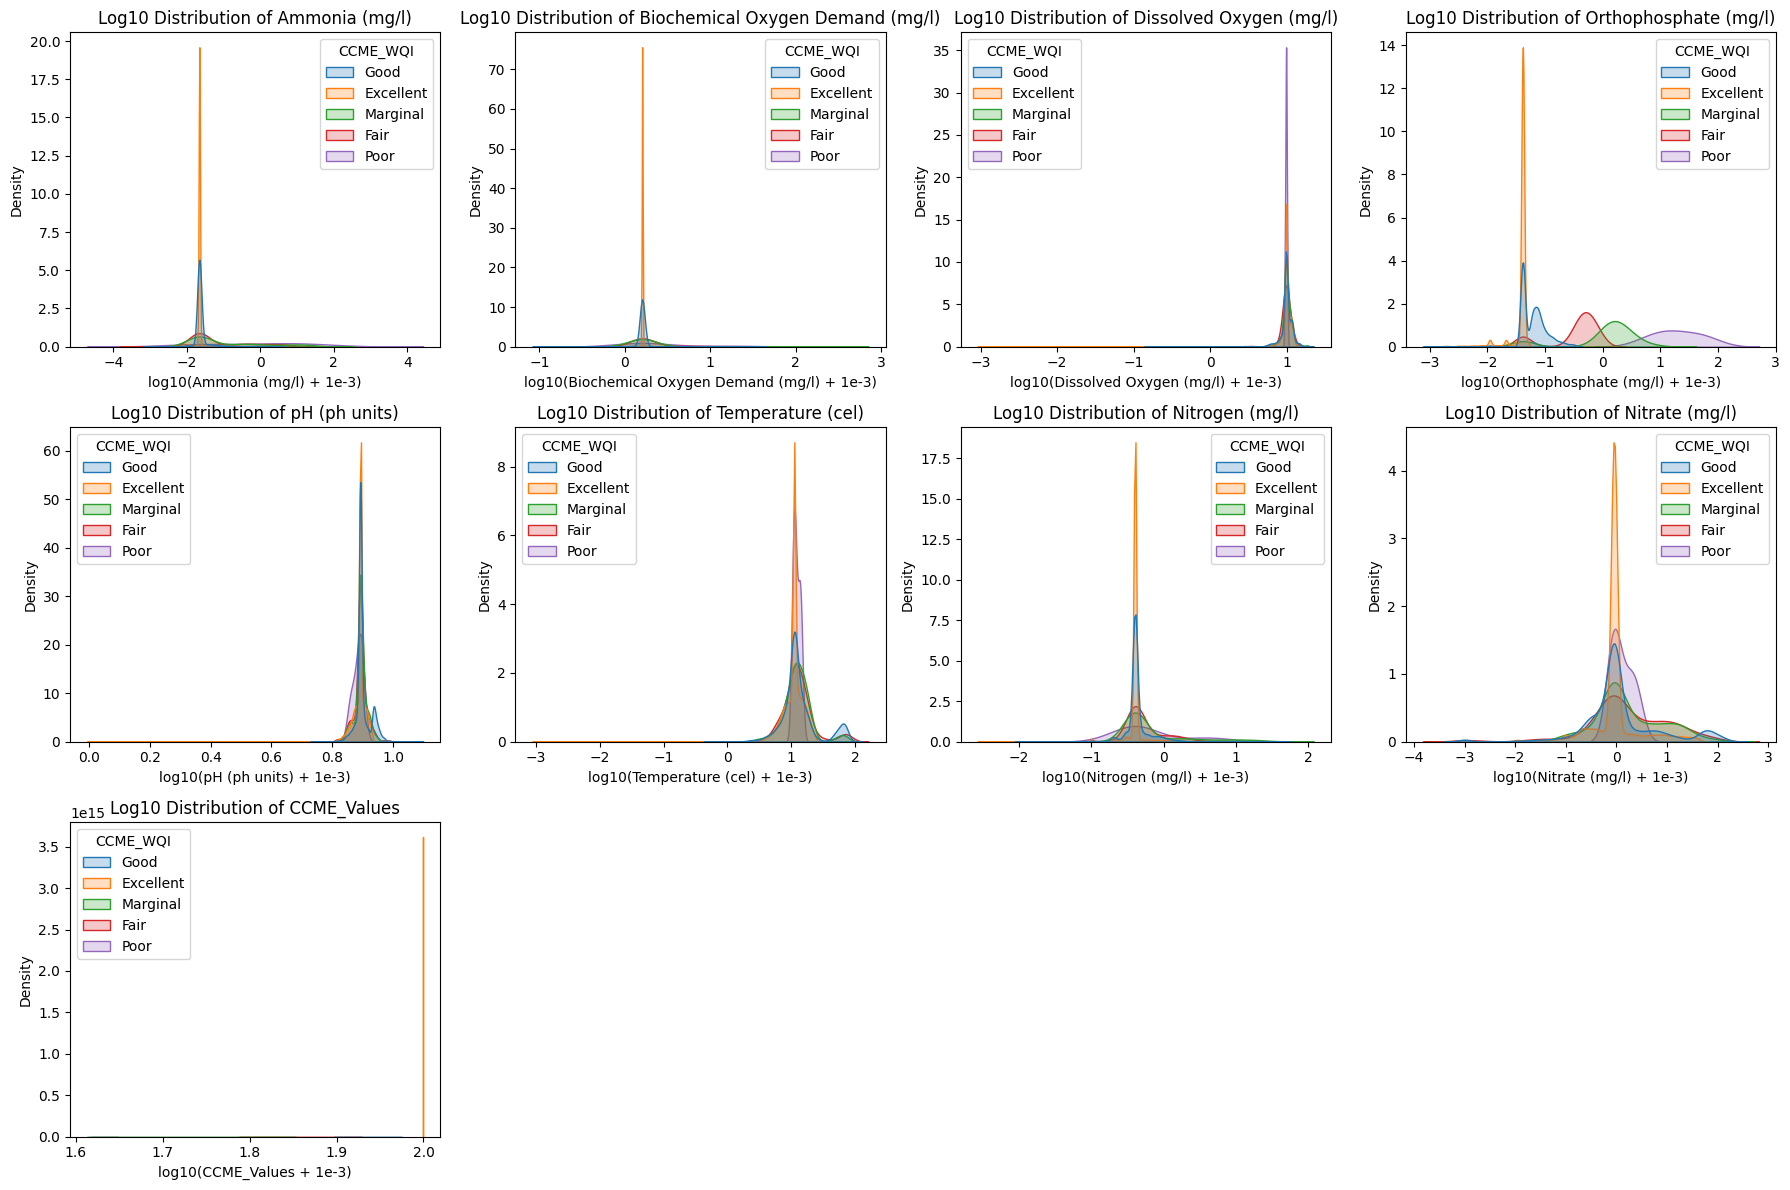

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_cols = usa_df.select_dtypes(include='number').columns

plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols, start=1):
    # Προσθέτουμε 1e-3 για αποφυγή προβλημάτων με log(0)
    values = usa_df[col] + 1e-3
    values = values[values > 0]  # μόνο θετικές τιμές
    if values.empty:
        continue

    plt.subplot(3, 4, i)
    sns.kdeplot(
        x=np.log10(values),
        hue=usa_df.loc[values.index, 'CCME_WQI'],
        fill=True,
        warn_singular=False,
        common_norm=False
    )
    plt.title(f'Log10 Distribution of {col}')
    plt.xlabel(f'log10({col} + 1e-3)')
    plt.tight_layout()

plt.show()


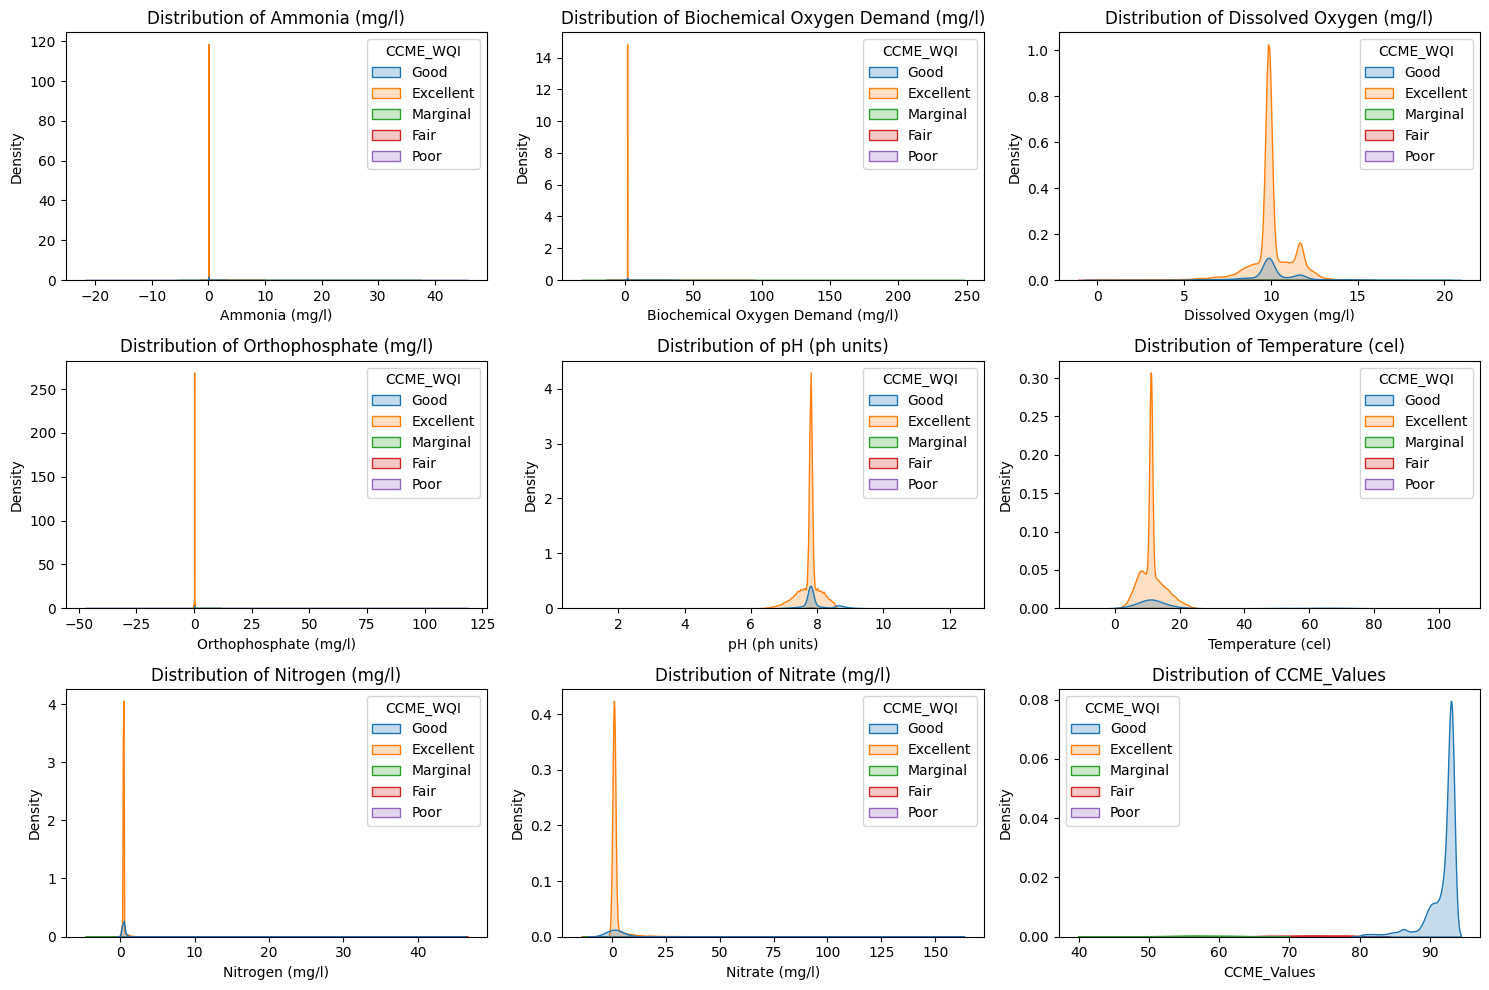

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = usa_df.select_dtypes(include='number').columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, start=1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data=usa_df, x=col, hue='CCME_WQI', fill=True, warn_singular=False)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

In [7]:
usa_df.describe()

,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),Orthophosphate (mg/l),pH (ph units),Temperature (cel),Nitrogen (mg/l),Nitrate (mg/l),CCME_Values
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,0.042523,1.720704,9.949784,0.057013,7.777137,12.230775,0.448978,3.023433,98.420866
std,0.458182,2.677286,1.493430,0.427012,0.360533,7.632712,0.632304,9.894290,4.763530
min,0.000000,0.100000,0.000000,0.000000,1.000000,0.000000,0.002000,0.000000,42.383770
25%,0.021000,1.600000,9.870000,0.040000,7.760000,9.610000,0.400000,0.900000,100.000000
50%,0.021000,1.600000,9.870000,0.040000,7.800000,11.100000,0.400000,0.900000,100.000000
75%,0.021000,1.600000,10.300000,0.040000,7.800000,12.800000,0.400000,0.900000,100.000000
max,32.000000,216.000000,20.000000,65.600000,12.200000,94.000000,46.000000,152.000000,100.000000


(array([2.1000e+01, 3.8000e+01, 9.0000e+01, 6.6000e+01, 7.8000e+01,
        9.7000e+01, 1.4500e+02, 3.6400e+02, 5.3380e+03, 3.3763e+04]),
 array([ 42.38376979,  48.14539281,  53.90701583,  59.66863885,
         65.43026187,  71.1918849 ,  76.95350792,  82.71513094,
         88.47675396,  94.23837698, 100.        ]),
 <BarContainer object of 10 artists>)

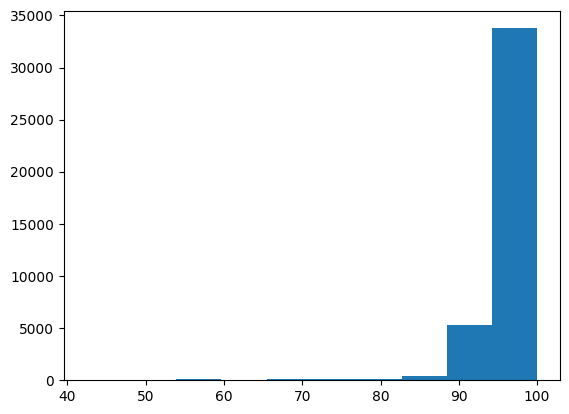

In [8]:
plt.hist(usa_df["CCME_Values"])




In [9]:
usa_df.columns = [col.strip().lower().replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_") for col in usa_df.columns]



# Define features and target
feature_cols = [
    'ammonia_mg_l',
    'biochemical_oxygen_demand_mg_l',
    'dissolved_oxygen_mg_l',
    'orthophosphate_mg_l',
    'ph_ph_units',
    'temperature_cel',
    'nitrogen_mg_l',
    'nitrate_mg_l'
]

##### Binary - Clasification 


In [10]:
usa_df['wqi_binary'] = usa_df['ccme_wqi'].apply(lambda x: 1 if x in ['Excellent', 'Good'] else 0)

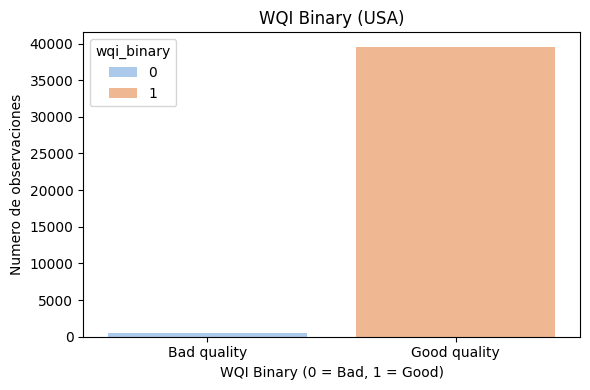

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram (countplot) for the binary target in Canada before prediction
plt.figure(figsize=(6, 4))
sns.countplot(data=usa_df, x='wqi_binary', palette='pastel',hue='wqi_binary')

plt.title('WQI Binary (USA)')
plt.xlabel('WQI Binary (0 = Bad, 1 = Good)')
plt.ylabel('Numero de observaciones')
plt.xticks([0, 1], ['Bad quality', 'Good quality'])
plt.tight_layout()
plt.show()


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from collections import Counter
from sklearn.ensemble import GradientBoostingClassifier

X = usa_df[feature_cols]
y = usa_df['wqi_binary']
class_counts = Counter(y)
scale_ratio = class_counts[0] / class_counts[1]
# model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
# model = RandomForestClassifier(class_weight='balanced', random_state=42)
# model = GradientBoostingClassifier(random_state=42)



model = XGBClassifier(
    scale_pos_weight=scale_ratio,
    eval_metric='logloss',
    random_state=42)



pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', model)
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1_macro')

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

scores.mean(), report, conf_matrix

(0.8856123147208853,
 {'0': {'precision': 0.6223776223776224,
   'recall': 1.0,
   'f1-score': 0.7672413793103449,
   'support': 89.0},
  '1': {'precision': 1.0,
   'recall': 0.9931740614334471,
   'f1-score': 0.9965753424657534,
   'support': 7911.0},
  'accuracy': 0.99325,
  'macro avg': {'precision': 0.8111888111888113,
   'recall': 0.9965870307167235,
   'f1-score': 0.8819083608880491,
   'support': 8000.0},
  'weighted avg': {'precision': 0.995798951048951,
   'recall': 0.99325,
   'f1-score': 0.9940240021256495,
   'support': 8000.0}},
 array([[  89,    0],
        [  54, 7857]], dtype=int64))

In [13]:
usa_df.head()

,country,area,waterbody_type,date,ammonia_mg_l,biochemical_oxygen_demand_mg_l,dissolved_oxygen_mg_l,orthophosphate_mg_l,ph_ph_units,temperature_cel,nitrogen_mg_l,nitrate_mg_l,ccme_values,ccme_wqi,wqi_binary
0,USA,San Joaquin,River,03-09-2002,0.0210,1.6,11.300000,0.27,7.80,10.0,0.4,0.900,83.081086,Good,1
1,USA,Los Angeles,River,12-05-1978,0.0210,1.6,11.684103,0.04,7.40,11.7,0.4,1.580,100.000000,Excellent,1
2,USA,Butte,River,20-01-2004,0.0210,1.6,0.438000,0.04,7.80,11.2,0.4,0.900,100.000000,Excellent,1
3,USA,Lake Sammamish,Lake,11-09-2007,0.0210,1.6,7.000000,0.04,7.54,11.1,0.4,0.900,100.000000,Excellent,1
4,USA,Central Puget Sound,Marine,06-05-2019,0.0373,1.6,9.870000,0.04,7.80,11.1,0.4,0.323,100.000000,Excellent,1


#### Multi - Clasificacion 

(array([5.7910e+03, 0.0000e+00, 3.3763e+04, 0.0000e+00, 0.0000e+00,
        2.0600e+02, 0.0000e+00, 2.3500e+02, 0.0000e+00, 5.0000e+00]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

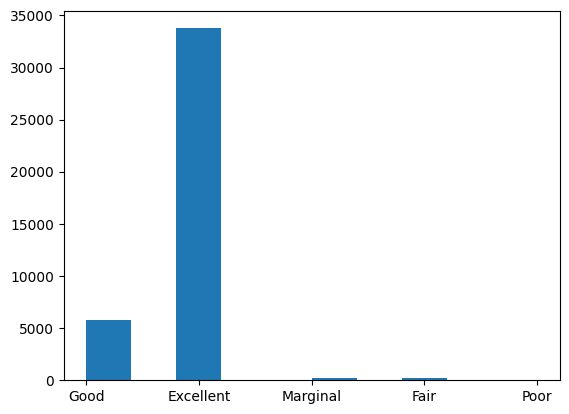

In [14]:
plt.hist(usa_df["ccme_wqi"])

In [15]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

y_multi = usa_df['ccme_wqi']
X = usa_df[feature_cols]

# Orden de categorias
quality_order = [['Poor', 'Marginal', 'Fair', 'Good', 'Excellent']]
oe = OrdinalEncoder(categories=quality_order)

y_array = np.array(y_multi).reshape(-1, 1)
y_encoded = oe.fit_transform(y_array).ravel()

# Modelos 
model = XGBClassifier(random_state=42)
# model = RandomForestClassifier(class_weight='balanced', random_state=42)
# model = GradientBoostingClassifier(random_state=42)

#  Pipeline 
pipeline_multi = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', model)
])

# Cross-validation 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline_multi, X, y_encoded, cv=cv, scoring='f1_macro')

print("Cross-validated F1-macro scores:", scores)
print("Average F1-macro:", np.mean(scores))

# Cross-validated predictions for classification report 
y_pred_cv = cross_val_predict(pipeline_multi, X, y_encoded, cv=cv)

#  Inverse transform 
y_pred_labels_cv = oe.inverse_transform(y_pred_cv.reshape(-1, 1)).ravel()
y_true_labels_cv = oe.inverse_transform(y_encoded.reshape(-1, 1)).ravel()

labels_order = ['Poor', 'Marginal', 'Fair', 'Good', 'Excellent']
print(classification_report(
    y_true_labels_cv,
    y_pred_labels_cv,
    labels=labels_order,
    target_names=labels_order
))


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Aggelos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Aggelos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Aggelos\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\pipeline.py", line 518, in fit
    Xt, yt = self._fit(X, y, routed_params, raw_params=params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Aggelos\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\pipeline.py", line 440, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
                               ^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Aggelos\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Aggelos\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\pipeline.py", line 1336, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **params.get("fit_resample", {}))
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Aggelos\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\base.py", line 202, in fit_resample
    return super().fit_resample(X, y, **params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Aggelos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Aggelos\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\base.py", line 105, in fit_resample
    output = self._fit_resample(X, y, **params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Aggelos\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\over_sampling\_smote\base.py", line 359, in _fit_resample
    nns = self.nn_k_.kneighbors(X_class, return_distance=False)[:, 1:]
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Aggelos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py", line 854, in kneighbors
    raise ValueError(
ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 4, n_samples = 4


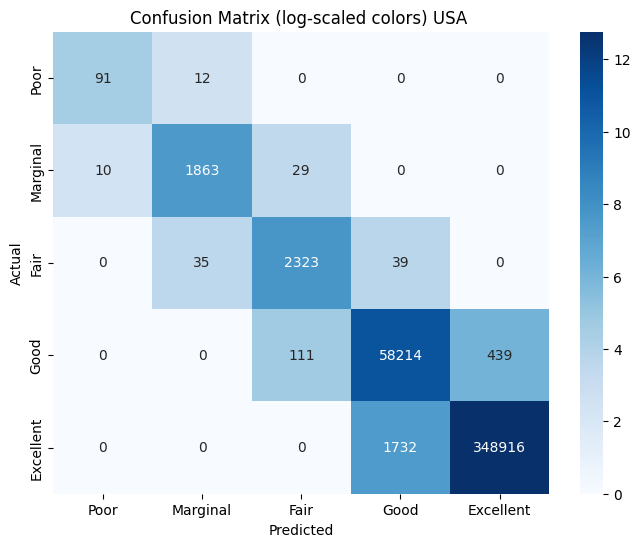

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Confusion Matrix  
cm = confusion_matrix(y_true_labels_cv, y_pred_labels_cv, labels=labels_order)

plt.figure(figsize=(8, 6))
sns.heatmap(
    np.log1p(cm),  # log(1 + x) por evitar log(0)
    annot=cm,
    fmt='d',
    cmap='Blues',
    xticklabels=labels_order,
    yticklabels=labels_order
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (log-scaled colors) USA ')
plt.show()


In [ ]:
# === 8. Feature Importance (μόνο από κανονική fit) ===
# Κάνουμε fit στο πλήρες training set για να δούμε τα weights
pipeline_multi.fit(X, y_encoded)
xgb_model = pipeline_multi.named_steps['classifier']

importances = xgb_model.feature_importances_

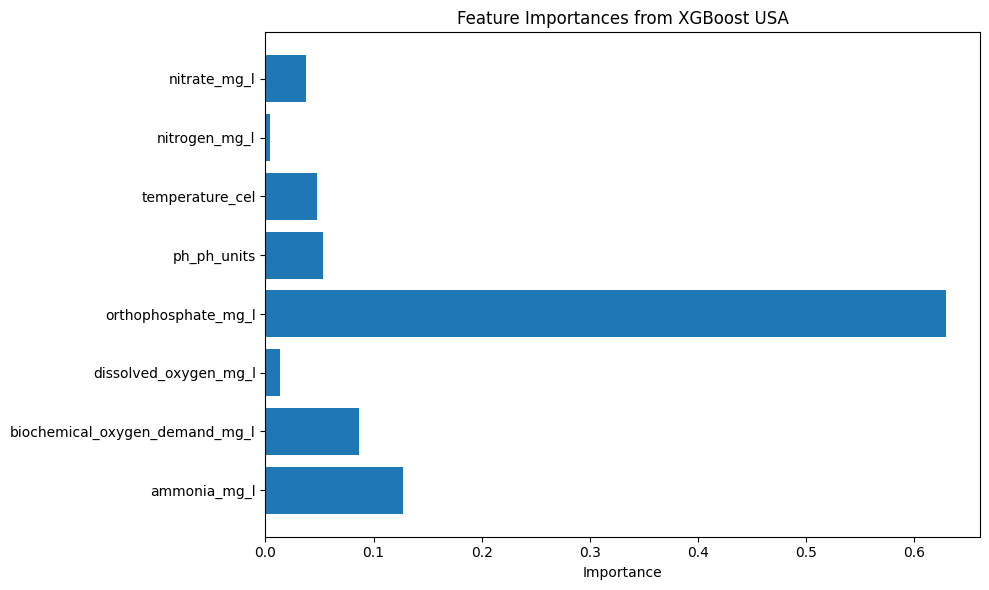

In [ ]:
# Προβολή
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances)
plt.yticks(ticks=np.arange(len(X.columns)), labels=X.columns)
plt.xlabel('Importance')
plt.title('Feature Importances from XGBoost USA')
plt.tight_layout()
plt.show()

In [ ]:
# Predict probabilities for class 0 (Bad water)
y_proba = pipeline.predict_proba(X_test)[:, 0]

# Create alert levels
X_test_alerts = X_test.copy()
X_test_alerts['proba_bad'] = y_proba
X_test_alerts['true_label'] = y_test.values
X_test_alerts['alert_level'] = pd.cut(
    y_proba,
    bins=[0, 0.4, 0.7, 1],
    labels=['Safe', 'Moderate Risk', 'High Risk']
)

# Return top 10 risk cases
X_test_alerts[['proba_bad', 'true_label', 'alert_level']].sort_values(by='proba_bad', ascending=False)


,proba_bad,true_label,alert_level
208583,1.0,0,High Risk
1267,1.0,0,High Risk
156094,1.0,0,High Risk
171106,1.0,0,High Risk
164889,1.0,0,High Risk
...,...,...,...
410431,0.0,1,NaN
316378,0.0,1,NaN
362730,0.0,1,NaN
173569,0.0,1,NaN


### Regresion 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Datos
X = usa_df[feature_cols]
y = usa_df['ccme_values']

# 2. modelos
model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_estimators=100,
    learning_rate=0.1
)

# 3. Pipeline
reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', model)
])

# 4. Train-test split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Fit & Predict
reg_pipeline.fit(X_train_r, y_train_r)
y_pred_r = reg_pipeline.predict(X_test_r)

mae = mean_absolute_error(y_test_r, y_pred_r)
rmse = np.sqrt(mean_squared_error(y_test_r, y_pred_r))
r2 = r2_score(y_test_r, y_pred_r)

print("=== Test Set Metrics ===")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

=== Test Set Metrics ===
MAE: 0.109
RMSE: 0.757
R²: 0.974


In [ ]:
# 7. Cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# R²
cv_r2_scores = cross_val_score(reg_pipeline, X, y, cv=cv, scoring='r2')
print("\n=== Cross-Validated R² Scores ===")
print(np.round(cv_r2_scores, 3))
print("Average R²:", np.mean(cv_r2_scores).round(3))

# MAE (-score)
cv_mae_scores = -cross_val_score(reg_pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error')
print("\n=== Cross-Validated MAE Scores ===")
print(np.round(cv_mae_scores, 3))
print("Average MAE:", np.mean(cv_mae_scores).round(3))


=== Cross-Validated R² Scores ===
[0.974 0.973 0.972 0.972 0.972]
Average R²: 0.973

=== Cross-Validated MAE Scores ===
[0.109 0.105 0.11  0.111 0.109]
Average MAE: 0.109


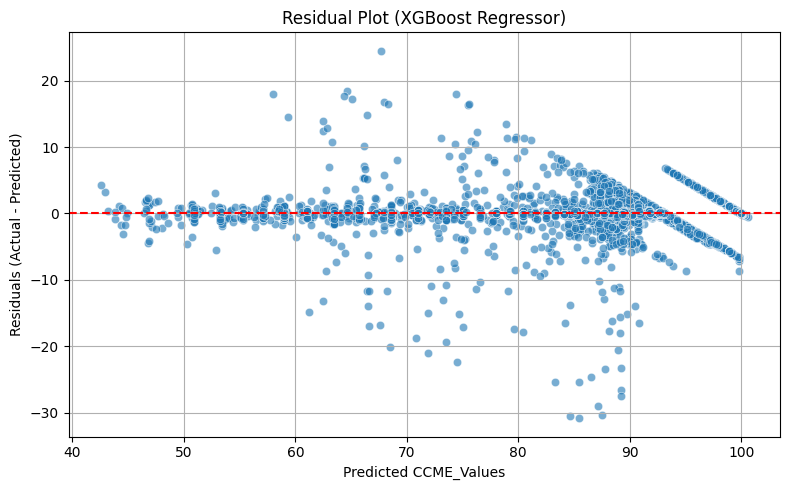

In [ ]:
# residuals
residuals = y_test_r - y_pred_r

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_r, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted CCME_Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (XGBoost Regressor)")
plt.grid(True)
plt.tight_layout()
plt.show()


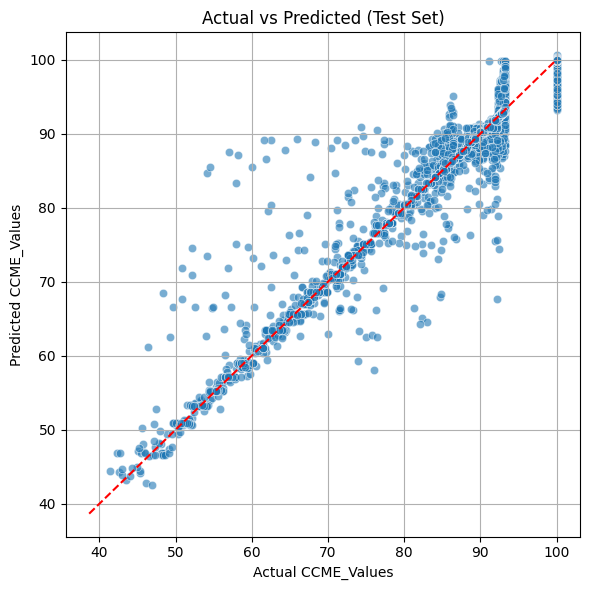

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_r, y=y_pred_r, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel('Actual CCME_Values')
plt.ylabel('Predicted CCME_Values')
plt.title('Actual vs Predicted (Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()

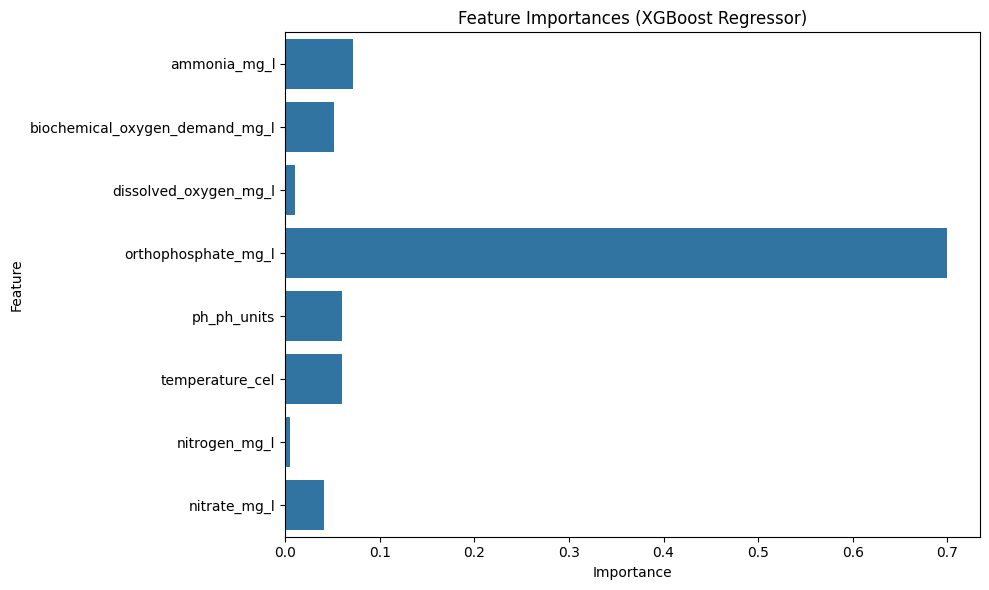

In [ ]:
# feature importance xgb modelo de pipeline
xgb_model = reg_pipeline.named_steps['regressor']
importances = xgb_model.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importances (XGBoost Regressor)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


#### Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import KFold
import numpy as np

# Standarizar
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(usa_df[feature_cols])

# KFold-like split (aunque unsupervised)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_idx, test_idx in kf.split(X_scaled):
    X_fold = X_scaled[train_idx]
    kmeans = KMeans(n_clusters=4, random_state=42)
    kmeans.fit(X_fold)
    
    # no "y")
    score = silhouette_score(X_fold, kmeans.labels_)
    scores.append(score)

print("Silhouette scores per fold:", np.round(scores, 3))
print("Average silhouette score:", np.mean(scores).round(3))


KeyboardInterrupt: 

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import silhouette_score
# import matplotlib.pyplot as plt
# import seaborn as sns

# # === 1. Επιλογή χαρακτηριστικών και κανονικοποίηση ===
# feature_cols = [
#     'ammonia_mg_l',
#     'biochemical_oxygen_demand_mg_l',
#     'dissolved_oxygen_mg_l',
#     'orthophosphate_mg_l',
#     'ph_ph_units',
#     'temperature_cel',
#     'nitrogen_mg_l',
#     'nitrate_mg_l'
# ]

# X = usa_df[feature_cols]
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

# # === 2. Υπολογισμός Silhouette Scores για διαφορετικά k ===
# silhouette_scores = []

# print("Silhouette Scores για k από 2 έως 9:")
# for k in range(2, 10):
#     km = KMeans(n_clusters=k, random_state=42)
#     labels = km.fit_predict(X_scaled)
#     score = silhouette_score(X_scaled, labels)
#     silhouette_scores.append(score)
#     print(f"k = {k} → silhouette = {score:.3f}")




Silhouette Scores για k από 2 έως 9:
k = 2 → silhouette = 0.744
k = 3 → silhouette = 0.473
k = 4 → silhouette = 0.295
k = 5 → silhouette = 0.284
k = 6 → silhouette = 0.283
k = 7 → silhouette = 0.238
k = 8 → silhouette = 0.271
k = 9 → silhouette = 0.275


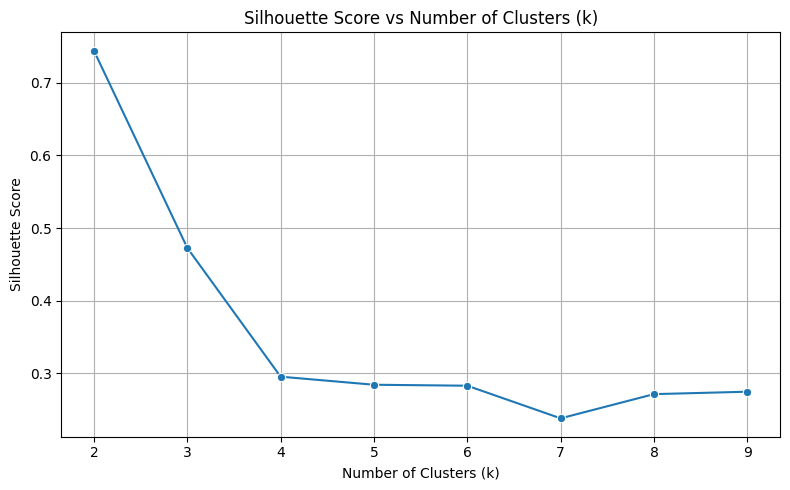

In [ ]:
# # === 3. Οπτικοποίηση αποτελεσμάτων ===
# plt.figure(figsize=(8, 5))
# sns.lineplot(x=range(2, 10), y=silhouette_scores, marker='o')
# plt.title("Silhouette Score vs Number of Clusters (k)")
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Silhouette Score")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

🔎 Silhouette Scores:
KMeans  (PCA):  0.781
GMM     (PCA):  0.355


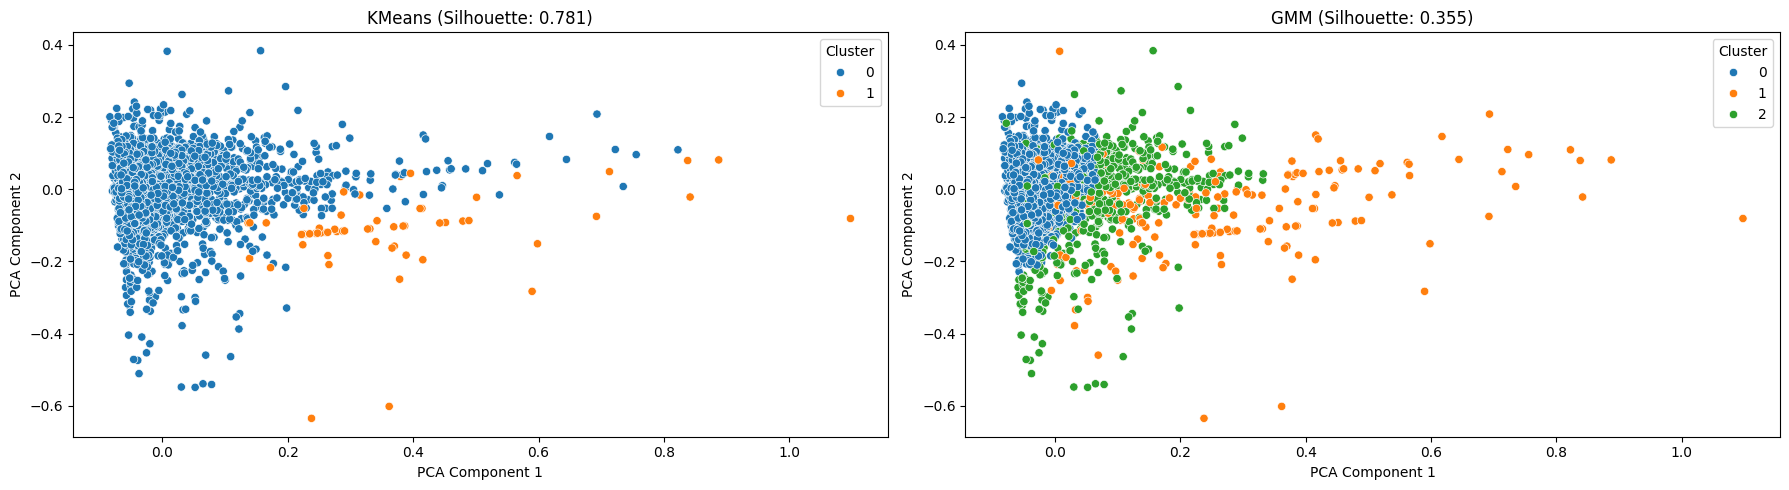

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans, DBSCAN
# from sklearn.mixture import GaussianMixture
# from sklearn.metrics import silhouette_score
# import matplotlib.pyplot as plt
# import seaborn as sns

# # === 1. Προετοιμασία Δεδομένων ===
# feature_cols = [
#     'ammonia_mg_l',
#     'biochemical_oxygen_demand_mg_l',
#     'dissolved_oxygen_mg_l',
#     'orthophosphate_mg_l',
#     'ph_ph_units',
#     'temperature_cel',
#     'nitrogen_mg_l',
#     'nitrate_mg_l'
# ]

# X = usa_df[feature_cols]
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

# # === 2. PCA ===
# pca = PCA(n_components=3)
# X_pca = pca.fit_transform(X_scaled)

# # === 3. KMeans on PCA ===
# kmeans = KMeans(n_clusters=2, random_state=42)
# kmeans_labels = kmeans.fit_predict(X_pca)
# sil_kmeans = silhouette_score(X_pca, kmeans_labels)

# # === 4. GMM on PCA ===
# gmm = GaussianMixture(n_components=3, random_state=42)
# gmm_labels = gmm.fit_predict(X_pca)
# sil_gmm = silhouette_score(X_pca, gmm_labels)

# # === 6. Σύγκριση Silhouette Scores ===
# print("🔎 Silhouette Scores:")
# print(f"KMeans  (PCA):  {sil_kmeans:.3f}")
# print(f"GMM     (PCA):  {sil_gmm:.3f}")

# # === 7. Οπτικοποίηση ===
# fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# # KMeans
# sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='tab10', ax=axes[0])
# axes[0].set_title(f'KMeans (Silhouette: {sil_kmeans:.3f})')

# # GMM
# sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=gmm_labels, palette='tab10', ax=axes[1])
# axes[1].set_title(f'GMM (Silhouette: {sil_gmm:.3f})')

# for ax in axes:
#     ax.set_xlabel("PCA Component 1")
#     ax.set_ylabel("PCA Component 2")
#     ax.legend(title="Cluster", loc='best')

# plt.tight_layout()
# plt.show()


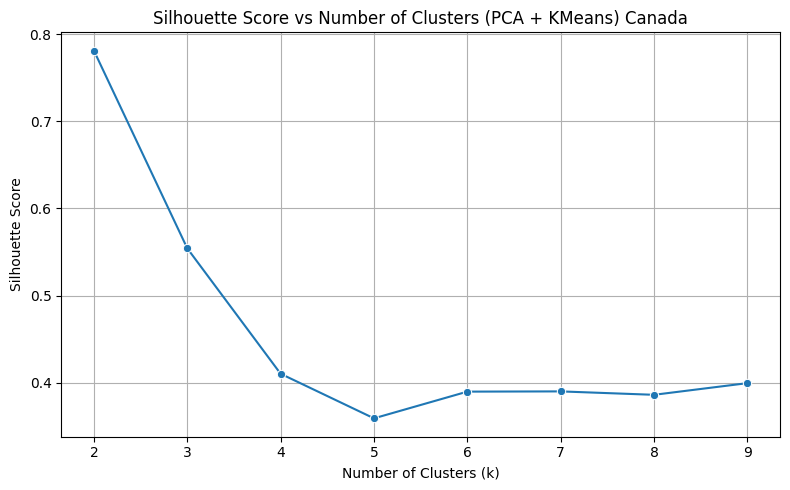

In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# import matplotlib.pyplot as plt
# import seaborn as sns

# # === PCA πριν το clustering ===
# pca = PCA(n_components=3)
# X_pca = pca.fit_transform(X_scaled)

# # === Silhouette για διάφορα k πάνω σε PCA-transformed data ===
# silhouette_pca_scores = []

# k_values = range(2, 10)
# for k in k_values:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     labels = kmeans.fit_predict(X_pca)
#     score = silhouette_score(X_pca, labels)
#     silhouette_pca_scores.append(score)

# # === Γράφημα ===
# plt.figure(figsize=(8, 5))
# sns.lineplot(x=k_values, y=silhouette_pca_scores, marker='o')
# plt.title("Silhouette Score vs Number of Clusters (PCA + KMeans) Canada")
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Silhouette Score")
# plt.grid(True)
# plt.tight_layout()
# plt.show()


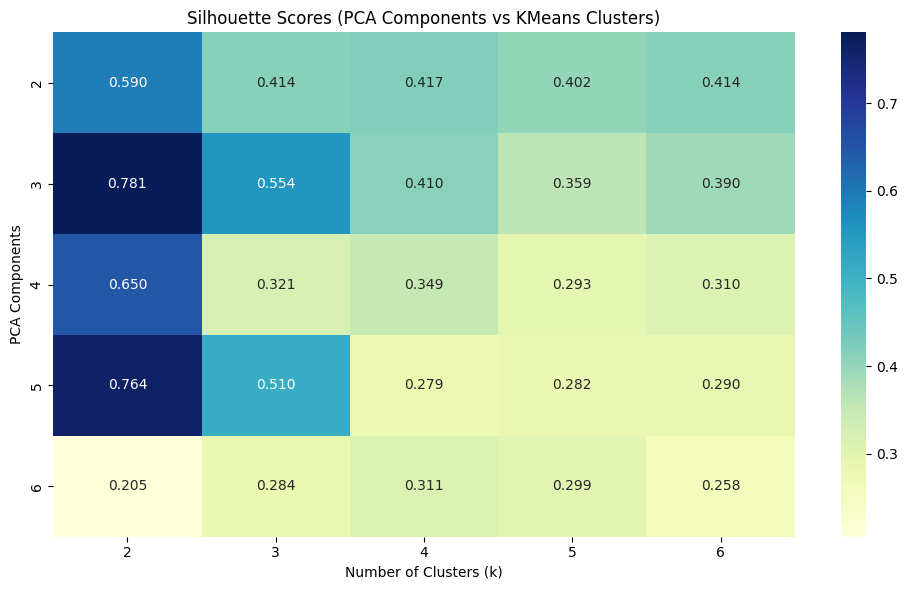

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Range
component_range = range(2, 7)  # PCA components: 2 a 6
k_range = range(2, 7)     # Clusters: 3 a 4

# Guardar resultados
results = []

for n_comp in component_range:
    pca = PCA(n_components=n_comp)
    X_pca = pca.fit_transform(X_scaled)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X_pca)
        score = silhouette_score(X_pca, labels)
        results.append({
            'n_components': n_comp,
            'k': k,
            'silhouette': score
        })

# Convertir a DataFrame
results_df = pd.DataFrame(results)

# Pivot por  heatmap
heatmap_data = results_df.pivot(index='n_components', columns='k', values='silhouette')

# Visualicación
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Silhouette Scores (PCA Components vs KMeans Clusters)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("PCA Components")
plt.tight_layout()
plt.show()
